In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [2]:
data=pd.read_csv('pinksheet.csv')

In [3]:
data.head(10)

,Unnamed: 0,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,"Coal, Colombian",Copra,Steel Index,"Steel, cold rolled coilsheet","Steel, hot rolled coilsheet",Steel rebar,Steel wire rod,"Cotton, Memphis","Rubber, US","Wheat, Canadian"
0,NaN,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,COAL_COL,COPRA,iSTL_JP_INDX,STL_JP_CROLL,STL_JP_HROLL,STL_JP_REBAR,STL_JP_WIROD,COTTON_MEMPH,RUBBER1_US,WHEAT_CANADI
1,1960M01,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,257,..,..,..,..,..,..,..,64
2,1960M02,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,248,..,..,..,..,..,..,..,64.09
3,1960M03,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,236,..,..,..,..,..,..,..,63.76
4,1960M04,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,214,..,..,..,..,..,..,..,63.35
5,1960M05,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,206,..,..,..,..,..,..,..,63.11
6,1960M06,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,189,..,..,..,..,..,..,..,62.84
7,1960M07,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,189,..,..,..,..,..,..,..,62.72
8,1960M08,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,188,..,..,..,..,..,..,..,62.52
9,1960M09,1.63,..,1.63,..,..,..,0.14,0.4,..,...,..,173,..,..,..,..,..,..,..,62.34


In [6]:
data1=data[1:721]
data2=data1[['Unnamed: 0','Cocoa']]
data2=data2.rename(columns={"Unnamed: 0":"date",
                           "Cocoa":"cocoa"})
data2.head(10)

,date,cocoa
1,1960M01,0.63
2,1960M02,0.61
3,1960M03,0.58
4,1960M04,0.6
5,1960M05,0.6
6,1960M06,0.59
7,1960M07,0.6
8,1960M08,0.59
9,1960M09,0.58
10,1960M10,0.59


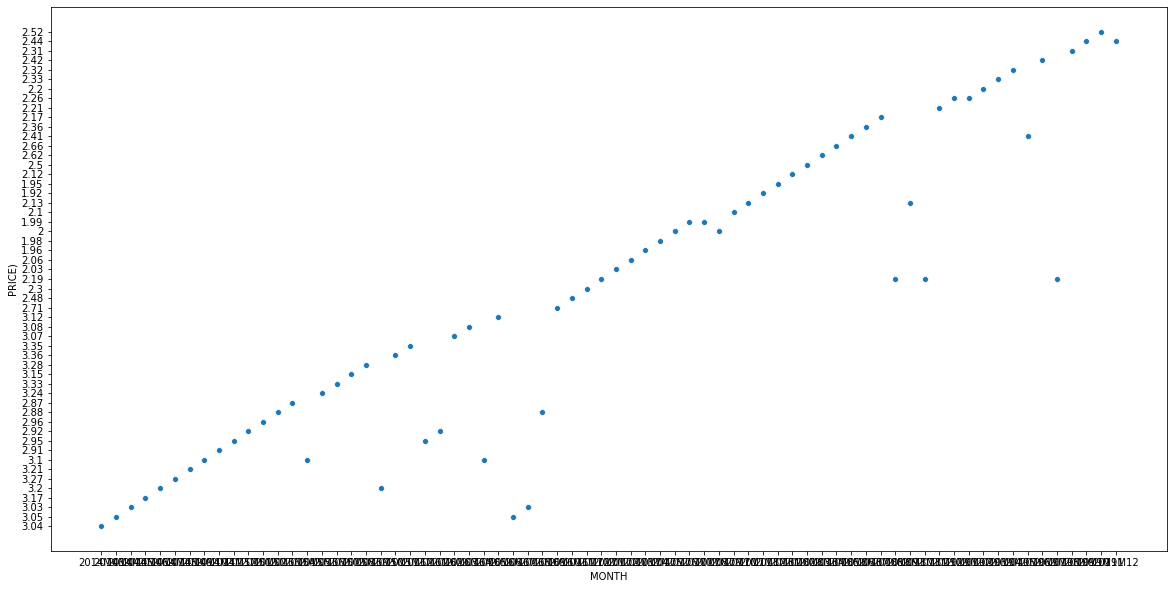

In [12]:
plt.figure(figsize=[20,10])
sns.scatterplot(data=data2[650:],x='date',y='cocoa')
plt.xlabel("MONTH")
plt.ylabel('PRICE)')
plt.show()

In [14]:
le=LabelEncoder()
le.fit(data2['date'])
data2['date']=le.transform(data2['date'])

In [15]:
x=np.asmatrix(data2['date']).reshape(-1,1)
y=np.asmatrix(data2['cocoa']).reshape(-1,1)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
lr=LinearRegression()
pre=lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
mean_squared_error(y_test,pred_lr)

0.46947745362193327

In [21]:
rfr=RandomForestRegressor(n_estimators=250,max_depth=8,random_state=1111)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
mean_squared_error(pred_rfr,y_test)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.012341656725067537